In [27]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# import keras module from tensorflow
from tensorflow import keras
import tensorflow as tf


In [28]:
# load dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [29]:
# Scalling the data, values are between 0 and 255
X_train = X_train/255
X_test = X_test/255

Step 1 - Implementing `log_dir` and `tb_callback`

```python
log_dir = "logs/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)
```

step 2 - run `tensorboard --logdir .\Tensorflow\logs\` in terminal


In [34]:
# flattering the data in keras


model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/sgd", histogram_freq=1)

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])
# model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6454 - accuracy: 0.8365
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3339 - accuracy: 0.9066
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2849 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2548 - accuracy: 0.9287
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2322 - accuracy: 0.9352


In [31]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2284 - accuracy: 0.9340


[0.22840918600559235, 0.9340000152587891]

313/313 [==============================] - 0s 979us/step


Text(95.72222222222221, 0.5, 'Truth')

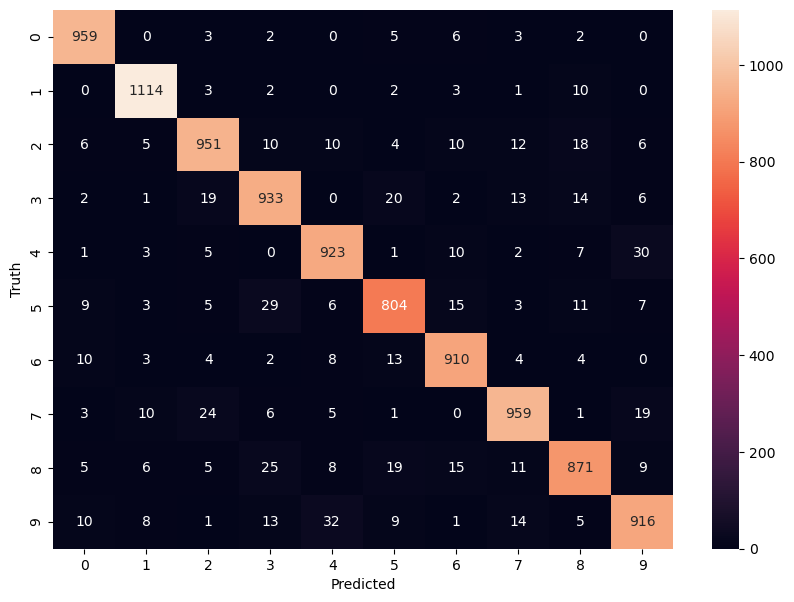

In [32]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")